In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
print(df.shape)
df.head()

(1044, 17)


,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


In [3]:
df.corr()["G3"]

C:\Users\User\AppData\Local\Temp\ipykernel_844\291854320.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["G3"]


age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

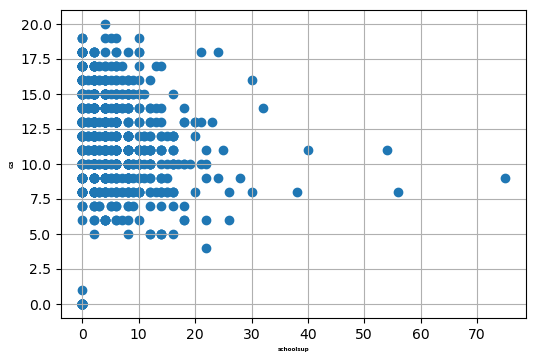

In [4]:
plt.figure(figsize=[6,4])
plt.scatter(df.absences, df.G3)
plt.xlabel("schoolsup", fontsize = 4, fontweight = 'bold')
plt.ylabel("G3", fontsize = 4, fontweight = 'bold')
plt.grid()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
df.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


In [7]:
df.schoolsup =df.schoolsup.map({"yes":1,"no":0,})
df.famsup = df.famsup.map({"yes":1,"no":0})
df.paid = df.paid.map({"yes":1,"no":0})
df.activities = df.activities.map({"yes":1,"no":0})
df.romantic = df.romantic.map({"yes":1,"no":0})
df.sex = df.sex.map({"F":1, "M":0})
df.famsize = df.famsize.map({"GT3":1,"LE3":0})
df.Pstatus = df.Pstatus.map({"A":1,"T":0})
df.internet = df.internet.map({"yes":1,"no":0,})

In [8]:
df.sex.value_counts()

1    591
0    453
Name: sex, dtype: int64

In [9]:
lm_exp = LinearRegression()

In [10]:
X = df.schoolsup.values.reshape(-1,1)
y = df.G3.values

In [11]:
lm_exp.fit(X,y)

LinearRegression()

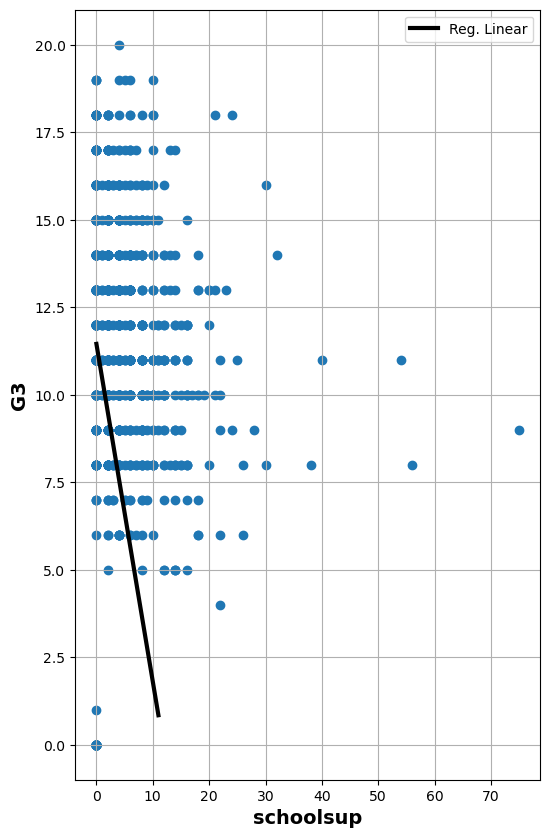

In [12]:
plt.figure(figsize=[6,10])
plt.scatter(df.absences, df.G3)
plt.xlabel("schoolsup", fontsize = 14, fontweight = 'bold')
plt.ylabel("G3", fontsize = 14, fontweight = 'bold')
plt.grid()

#inserindo a reta da regressão linear
xlims = np.arange(0,12)
plt.plot(xlims, lm_exp.predict(xlims.reshape(-1,1)), c = 'black', lw = 3, label = 'Reg. Linear')
plt.legend()
plt.show()

In [13]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
dftrain, dftest = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(1044, 17)
(783, 17)
(261, 17)


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [17]:
variaveis_para_normaliza = ["sex","age","famsize","Pstatus","traveltime","studytime","schoolsup","famsup","paid","activities",
        "internet","romantic","famrel","freetime","goout","absences"]

In [18]:
sc.fit(df[variaveis_para_normaliza])

StandardScaler()

In [19]:
sc.transform(df[variaveis_para_normaliza])

array([[ 0.87549841,  1.02788947,  0.64392092, ..., -0.19509888,
         0.73251148,  0.2521546 ],
       [ 0.87549841,  0.22103488,  0.64392092, ..., -0.19509888,
        -0.1355271 , -0.07006009],
       [ 0.87549841, -1.3926743 , -1.55298574, ..., -0.19509888,
        -1.00356568,  0.89658397],
       ...,
       [ 0.87549841,  1.02788947,  0.64392092, ..., -2.1349392 ,
        -1.87160426,  0.2521546 ],
       [-1.14220653,  0.22103488, -1.55298574, ...,  0.77482128,
         1.60055006,  0.2521546 ],
       [-1.14220653,  1.02788947, -1.55298574, ...,  0.77482128,
        -1.87160426, -0.07006009]])

In [28]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):

    dff = df.copy()
    

    #retirando valores faltantes
    dff = dff.dropna(axis = 0)
    
    variaveis_para_normalizar = ['sex','age','famsize','Pstatus','traveltime',
                                 'studytime','schoolsup','famsup','paid',
                                 'activities','internet','romantic','famrel',
                                 'freetime','goout','absences']
    
    if dataset_de_treino:  
        
        #OHE
        encoder = OneHotEncoder()
        df_tem_est_sem_ONE = encoder.fit_transform(dff[['studytime']]).toarray()

        #normalização
        sc = StandardScaler()
        variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar])
        
        X, y =  np.c_[df_tem_est_sem_ONE, variaveis_norm], dff.G3.values
        return X, y, encoder, sc
    
    else:
        #OHE
        df_tem_est_sem_ONE = cat_encoder.transform(dff[['studytime']]).toarray()
        
        #normalização
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar]) 
        
        X, y =  np.c_[df_tem_est_sem_ONE, variaveis_norm],dff.G3.values
        return X, y

In [29]:
Xtrain, ytrain, encoder_train, scaler_train  = preprocessamento_completo(df = dftrain, 
                                                                         dataset_de_treino = True, 
                                                                         cat_encoder = None, 
                                                                         std_scaler = None)

In [31]:
Xtrain.shape, ytrain.shape, dftrain.shape

((783, 20), (783,), (783, 17))

In [30]:
Xtest, ytest = preprocessamento_completo(df = dftest, 
                                         dataset_de_treino = False, 
                                         cat_encoder = encoder_train, 
                                         std_scaler = scaler_train)

In [32]:
Xtest.shape, ytest.shape, dftest.shape

((261, 20), (261,), (261, 17))

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#metricas de performance
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain,ytrain)

LinearRegression()

In [36]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

3.8237210861432556

In [37]:
r2_score(y_true=ytrain, y_pred=lin_reg.predict(Xtrain))

0.10536568524970835

In [38]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)
    
    preds = knn.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:1.02 / R2: 0.94
K = 2 | RMSE:2.58 / R2: 0.59
K = 5 | RMSE:3.38 / R2: 0.3
K = 10 | RMSE:3.59 / R2: 0.21
K = 20 | RMSE:3.72 / R2: 0.15
K = 50 | RMSE:3.8 / R2: 0.11


In [39]:
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)
    
    preds = dt.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:4.0 / R2: 0.02
Profundidade da árvore = 5 | RMSE:3.61 / R2: 0.2
Profundidade da árvore = 10 | RMSE:2.28 / R2: 0.68
Profundidade da árvore = 100 | RMSE:0.72 / R2: 0.97


In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = Xtrain, 
                             y = ytrain, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[ 0.03841457  0.06733467  0.07083767 -0.02032046  0.04537755]
media:  0.040328800568796466
desvio padrão:  0.03276459791282638


In [42]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = Xtrain, 
                                 y = ytrain, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

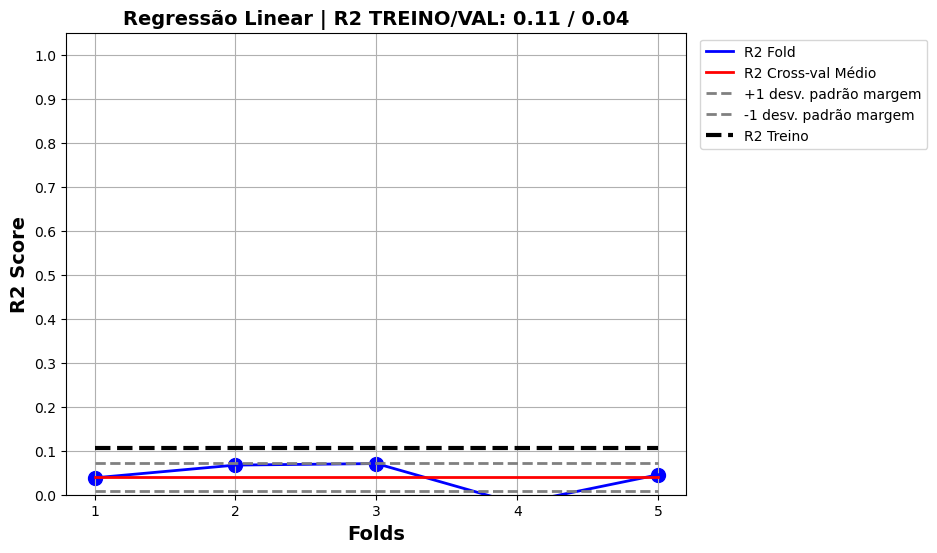

In [43]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

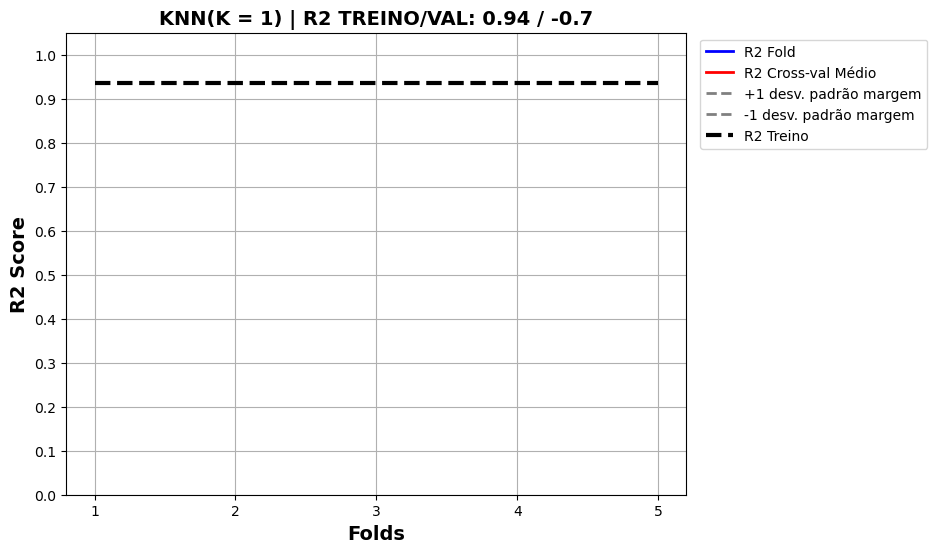

In [44]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

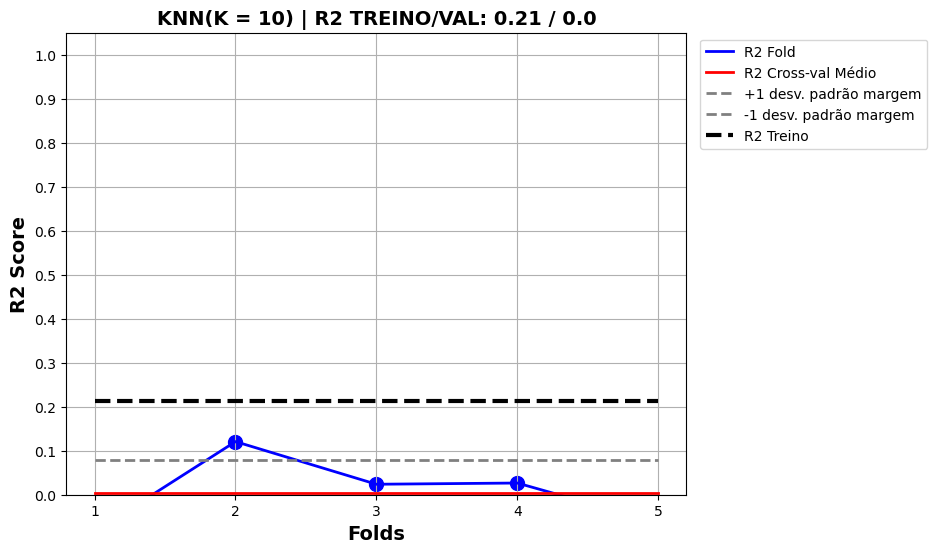

In [45]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

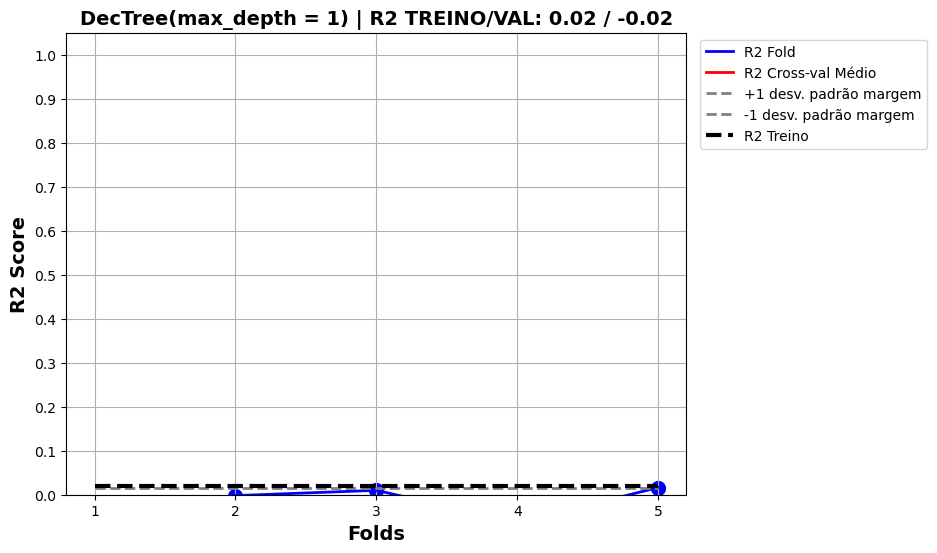

In [46]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'DecTree(max_depth = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

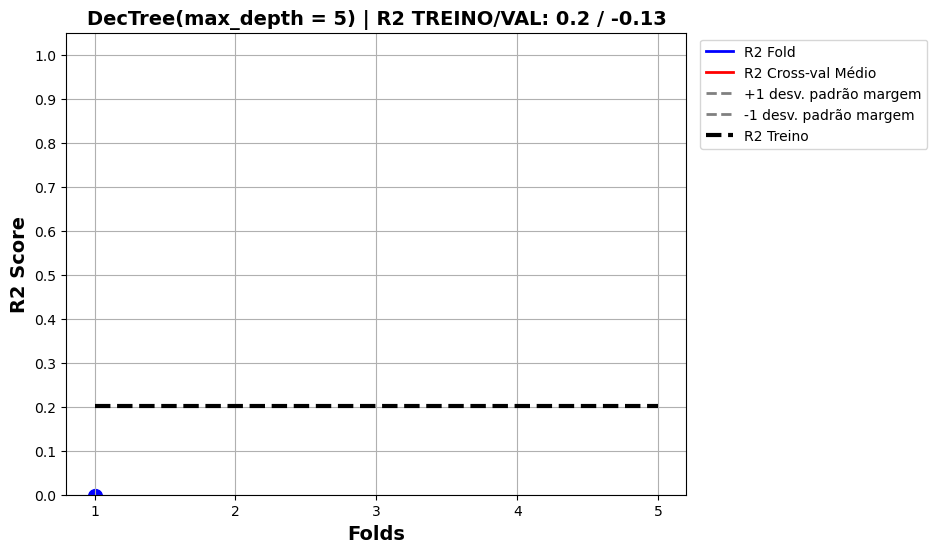

In [47]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 5),
                           nome_modelo = 'DecTree(max_depth = 5)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

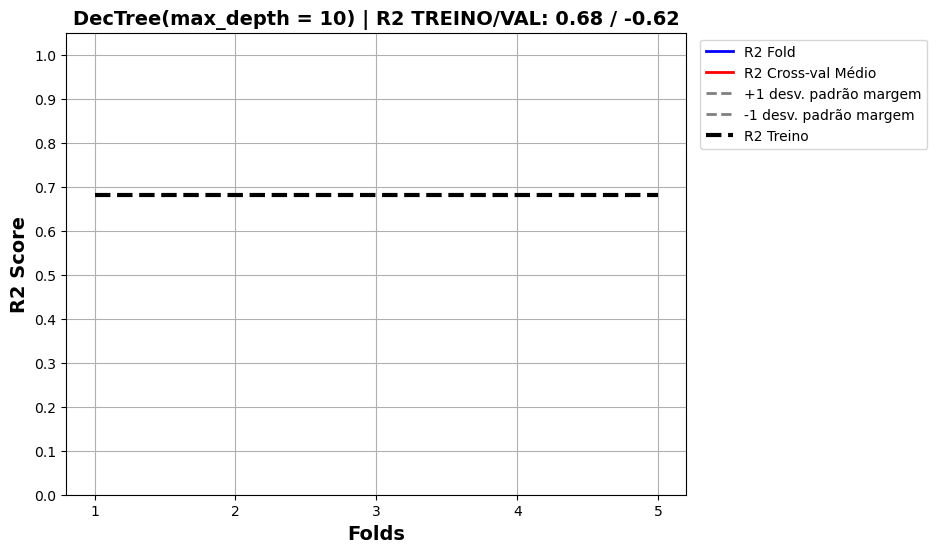

In [48]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 10),
                           nome_modelo = 'DecTree(max_depth = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

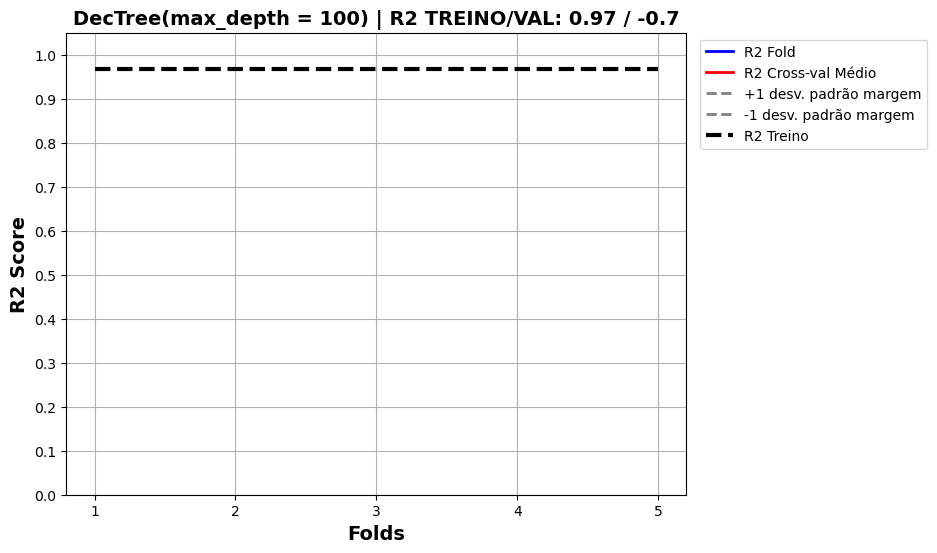

In [49]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 100),
                           nome_modelo = 'DecTree(max_depth = 100)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

In [50]:
modelo_final = KNeighborsRegressor(n_neighbors = 10)
modelo_final.fit(Xtrain, ytrain)

KNeighborsRegressor(n_neighbors=10)

In [51]:
preds_modelo_final = modelo_final.predict(Xtest)

In [52]:
r2_score(y_true = ytest, y_pred = preds_modelo_final)

0.13011842818051755

In [53]:
rmse_teste_final = RMSE(ytrue = ytest, ypred = preds_modelo_final)
rmse_teste_final

3.0320383745890886

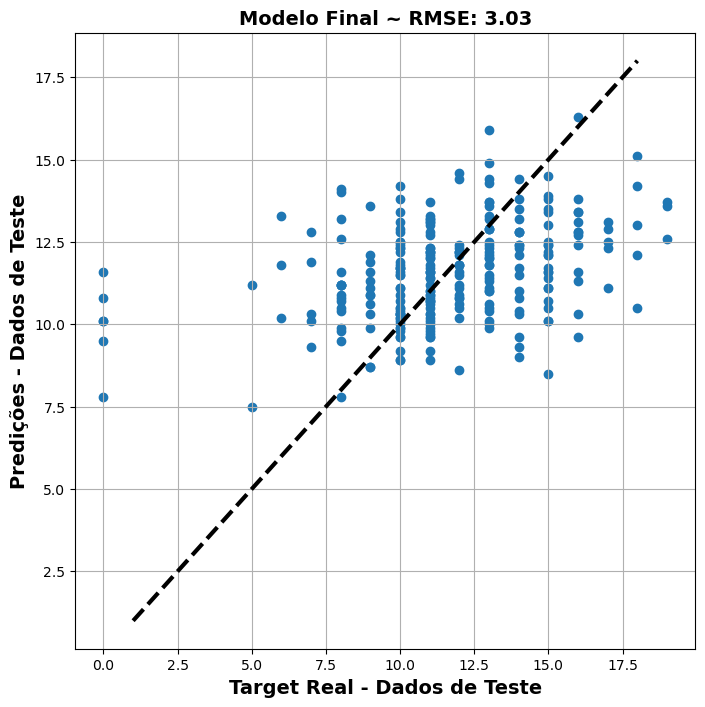

In [54]:
plt.figure(figsize=[8,8])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_final,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(ytest, preds_modelo_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()